In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# to determine the chi2 value
from sklearn.feature_selection import chi2

# to select the features
from sklearn.feature_selection import SelectKBest

In [2]:
# load dataset

data = pd.read_csv('titanic.csv')
data.shape

(418, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)

# for Embarked
ordinal_label = {k: i for i, k in enumerate(data['Embarked'].unique(), 0)}
data['Embarked'] = data['Embarked'].map(ordinal_label)

# pclass is already ordinal

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Pclass', 'Sex', 'Embarked']],
    data['Survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((292, 3), (126, 3))

In [9]:
f = chi2(X_train.fillna(0) , y_train)

In [10]:
f

(array([ 0.6585175, 97.       ,  1.7639138]),
 array([4.17083812e-01, 6.93273308e-23, 1.84137092e-01]))

In [11]:
s = pd.Series(f[1])
s.index = X_train.columns
s.sort_values(ascending = False)

Pclass      4.170838e-01
Embarked    1.841371e-01
Sex         6.932733e-23
dtype: float64

In [15]:
l = []
for i in s:
    if i < 0.05:
        l.append(i)
l

[6.932733083405917e-23]

<AxesSubplot:>

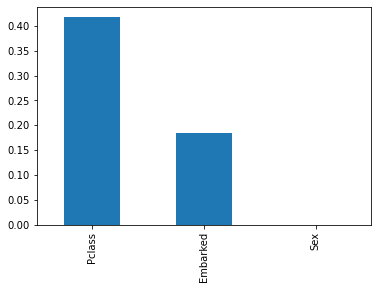

In [12]:
s.sort_values(ascending = False).plot.bar()

In [16]:
k = SelectKBest(chi2 , k = 2).fit(X_train,y_train)

In [17]:
X_train = k.transform(X_train)
X_test = k.transform(X_test)